In [1]:
from keras.datasets.cifar import load_batch
from keras.utils.data_utils import get_file
import os
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt


def load_data(label_mode='fine'):
    """Loads CIFAR100 dataset.
    # Arguments
        label_mode: one of "fine", "coarse".
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    # Raises
        ValueError: in case of invalid `label_mode`.
    """
    if label_mode not in ['fine', 'coarse']:
        raise ValueError('`label_mode` must be one of `"fine"`, `"coarse"`.')

    dirname = 'cifar-100-python'
    origin = 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'
    path = get_file(dirname, origin=origin, untar=True, cache_dir='.')

    fpath = os.path.join(path, 'train')
    x_train, y_train = load_batch(fpath, label_key=label_mode + '_labels')

    fpath = os.path.join(path, 'test')
    x_test, y_test = load_batch(fpath, label_key=label_mode + '_labels')

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if K.image_data_format() == 'channels_last':
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    return x_train, y_train, x_test, y_test

Using TensorFlow backend.


In [2]:
X_train, y_train, X_test, y_test = load_data()

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


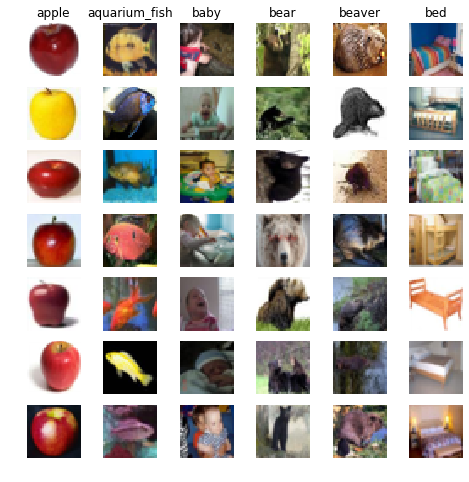

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed']
plt.figure(figsize=(8,8))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
import tensorflow as tf

In [6]:
def model(X, y):
  #  X = tf.expand_dims(X, axis = 3)
    with tf.variable_scope('first'):
        outs = tf.layers.conv2d(X, 64, 7, strides=(2,2), padding = 'same')
        print(outs)

In [7]:
#model(X_train[0], y_train)


X = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
y= tf.placeholder(tf.int32)
model(X, y)

Tensor("first/conv2d/BiasAdd:0", shape=(?, 16, 16, 64), dtype=float32)
